In [1]:
pwd

'C:\\Users\\Admin\\Downloads\\data'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the quarterly data files

In [3]:
Q1_16 = pd.read_csv('2016Q1.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Q2_16 = pd.read_csv('2016Q2.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (20,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
Q3_16 = pd.read_csv('2016Q3.csv')

In [6]:
Q4_16 = pd.read_csv('2016Q4.csv')

In [7]:
Q1_17 = pd.read_csv('2017Q1.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (119) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
Q2_17 = pd.read_csv('2017Q2.csv')
Q3_17 = pd.read_csv('2017Q3.csv')
Q4_17 = pd.read_csv('2017Q4.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (130,131,132,135,136,137,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Prepare final dataframe

In [9]:
data = pd.concat([Q1_16,Q2_16,Q3_16,Q4_16,Q1_17,Q2_17,Q3_17,Q4_17])

In [10]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,75910406,NaN,8400,8400,8400.0,36 months,9.75%,270.06,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,75768614,NaN,12000,12000,12000.0,36 months,7.89%,375.43,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,75650131,NaN,28000,28000,28000.0,36 months,7.39%,869.57,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,76084025,NaN,10000,10000,10000.0,36 months,13.67%,340.18,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,76003313,NaN,20000,20000,20000.0,36 months,11.99%,664.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.shape

(877986, 152)

Let us see the columns with missing values and the proportion of values missing in those columns

In [12]:
def null_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [13]:
miss_values = null_values(data)
miss_values

Dataframe has 152 columns.
There are 75 columns that have missing values.


,Missing Values,% of Total Values
member_id,877986,100.0
desc,877963,100.0
orig_projected_additional_accrued_interest,873311,99.5
hardship_dpd,872081,99.3
hardship_length,872081,99.3
hardship_status,872081,99.3
deferral_term,872081,99.3
hardship_amount,872081,99.3
hardship_start_date,872081,99.3
hardship_end_date,872081,99.3


In [14]:
miss_values.reset_index(inplace = True)

In [15]:
miss_values.columns = ['columns','missing values','% of missing values']

Drop columns with more than 50 percent of missing values

In [16]:
col = miss_values[miss_values['% of missing values']>50]['columns']

In [17]:
data.drop(col,axis=1,inplace=True) #Drop columns that have more than 50% missing values

In [19]:
data.shape

(877986, 109)

Look at the columns with missing values less than 50 %

In [20]:
miss_values[miss_values['% of missing values']<50] #Look at the columns with missing values less than 50%

,columns,missing values,% of missing values
42,mths_since_last_delinq,427508,48.7
43,next_pymnt_d,345045,39.3
44,il_util,119203,13.6
45,mths_since_recent_inq,97436,11.1
46,emp_title,60837,6.9
47,emp_length,60085,6.8
48,num_tl_120dpd_2m,43631,5.0
49,mths_since_rcnt_il,24884,2.8
50,mo_sin_old_il_acct,24829,2.8
51,title,23173,2.6


From columns that have missing values less than 50%, dropping columns that are not useful. 
These columns either have lot of missing values or lot of categorical values.

In [22]:
data.drop('mths_since_last_delinq',axis=1,inplace=True) #almost 50% missing values, hence dropped
data.drop('next_pymnt_d', axis=1,inplace=True) #next payment date dropped, 40% missing values
data.drop('emp_title', axis=1, inplace=True) #Emp title is not useful for us. Too many categorical values. Hence dropped.

Now let us look at the remaining columns that have missing values. We divide them into two categories.
1. Missing Numeric or Float columns
2. Missing Categorical columns

In [28]:
miss_col = data.columns[data.isnull().any()] #columns with missing data

Columns with missing values with datatype as 'Int' or 'Float'

In [29]:
miss_num_col = data[miss_col].select_dtypes(exclude='object').head().columns #numeric columns with missing data

Columns with missing values with datatype 'Object'

In [30]:
miss_ctg_col = data[miss_col].select_dtypes(include='object').head().columns #categorical columns with missing data

Now let us deal with columns with missing values that have datatype 'Int' or 'Float'.

1. If the data distribution of a column is skewed, we impute the missing values with median
2. If the data follows normal distribution, we impute the missing values in the column with mean
3. If the majority of data in the column takes only one value (>50%), we impute the missing values with mode

In [33]:
miss_num_col

Index(['dti', 'inq_last_6mths', 'mths_since_last_delinq', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mths_since_recent_bc', 'num_tl_120dpd_2m', 'percent_bc_gt_75'],
      dtype='object')

The following cell is just a place holder to check the data distributions of different columns, so that we know whether to use
mean, median or mode to impute the missing values

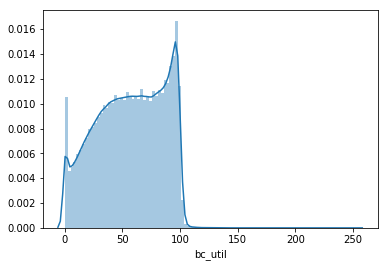

In [179]:
sns.distplot(data['bc_util'], bins=100) #Placeholder cell
#plt.xlim([0,500.0])

In [210]:
data['percent_bc_gt_75'].median() #Placeholder cell

33.3

Imputing the columns with missing values with median, mean or mode based on their data distribution

In [ ]:
########

In [41]:
data['dti'].fillna(data['dti'].median(), inplace=True) #imputed with median since data has outliers

In [79]:
data['inq_last_6mths'].fillna(value = 0.0,inplace=True) #imputed with mode since majority of values are zero

In [73]:
data['open_acc_6m'].fillna(value = 0.000000,inplace=True) #imputed with mode since majority of values are zero

In [85]:
data['open_act_il'].fillna(data['open_act_il'].median(),inplace=True) #imputed with median based on data distribution

In [93]:
data['open_il_12m'].fillna(data['open_il_12m'].median(),inplace=True)#imputed with median based on data distribution

In [99]:
data['open_il_24m'].fillna(data['open_il_24m'].median(),inplace=True)#imputed with median based on data distribution

In [109]:
data['mths_since_rcnt_il'].fillna(data['mths_since_rcnt_il'].median(),inplace=True)#imputed with median because data was skewed

In [122]:
data['total_bal_il'].fillna(data['total_bal_il'].median(),inplace=True) #imputed with median because data was skewed

In [129]:
data['open_rv_12m'].fillna(data['open_rv_12m'].median(),inplace=True) #imputed with median because data was skewed

In [135]:
data['open_rv_24m'].fillna(data['open_rv_24m'].median(),inplace=True) #imputed with median because data was skewed

In [138]:
data['max_bal_bc'].fillna(data['max_bal_bc'].median(),inplace=True) #imputed with median because of few large values

In [148]:
data['all_util'].fillna(data['all_util'].median(),inplace=True) #can be imputed with mean or median

In [154]:
data['inq_fi'].fillna(value=0.0,inplace=True) #more than 50% of values are 0

In [158]:
data['total_cu_tl'].fillna(value=0.0,inplace=True) #more than 50% of values are 0

In [165]:
data['inq_last_12m'].fillna(data['inq_last_12m'].median(),inplace=True) #imputed with median because data was skewed

In [172]:
data['avg_cur_bal'].fillna(data['avg_cur_bal'].median(),inplace=True) #imputed with median because data was skewed

In [178]:
data['bc_open_to_buy'].fillna(data['bc_open_to_buy'].median(),inplace=True) #imputed with median because data was skewed

In [182]:
data['bc_util'].fillna(data['bc_util'].median(),inplace=True) #can be imputed with mean or median

In [187]:
data['mo_sin_old_il_acct'].fillna(data['mo_sin_old_il_acct'].median(),inplace=True) #can be imputed with mean or median

In [191]:
data['mths_since_recent_bc'].fillna(data['mths_since_recent_bc'].median(),inplace=True) #imputed with median because data was skewed

In [199]:
data['num_tl_120dpd_2m'].fillna(value=0.0,inplace=True) #almost all values in the column are 0

In [211]:
data['percent_bc_gt_75'].fillna(data['percent_bc_gt_75'].median(),inplace=True) #can be imputed with mean or median
data['il_util'].fillna(data['il_util'].median(), inplace=True) #il_util impute
data['mths_since_recent_inq'].fillna(data['mths_since_recent_inq'].median(), inplace=True) #mths_since_recent_inq impute

Now that we have imputed the columns with datatype 'Int' or 'Float', let us look at the columns with datatype 'Object' 

In [213]:
miss_ctg_col    #Categorical columns missing in dataset

Index(['emp_length', 'title', 'zip_code', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

Replace the missing values in columns with most frequent value in the column (i.e. mode)

In [218]:
#impute categorical and text columns with most frequent value
data['emp_length'].fillna(data['emp_length'].mode()[0],inplace=True)
data['title'].fillna(data['title'].mode()[0],inplace=True)
data['zip_code'].fillna(data['zip_code'].mode()[0],inplace=True)
data['revol_util'].fillna(data['revol_util'].mode()[0],inplace=True)
data['last_pymnt_d'].fillna(data['last_pymnt_d'].mode()[0],inplace=True)
data['last_credit_pull_d'].fillna(data['last_credit_pull_d'].mode()[0],inplace=True)

In [219]:
data.columns[data.isnull().any()] #No missing data in the dataset

Index([], dtype='object')

In [226]:
data.drop('Unnamed: 0', axis=1,inplace=True) #dropping the useless column

Data with no missing values

In [228]:
data.to_csv("lending_club.csv", index=False)

We have dropped columns that have large number of missing values which doesnt make sense to impute.


For remaining columns we have imputed with appropriate values by carefully looking at the data distribution of each and every column

Lets look at correlation between few important columns in our dataset

In [348]:
df_LC = data.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership',
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status'])

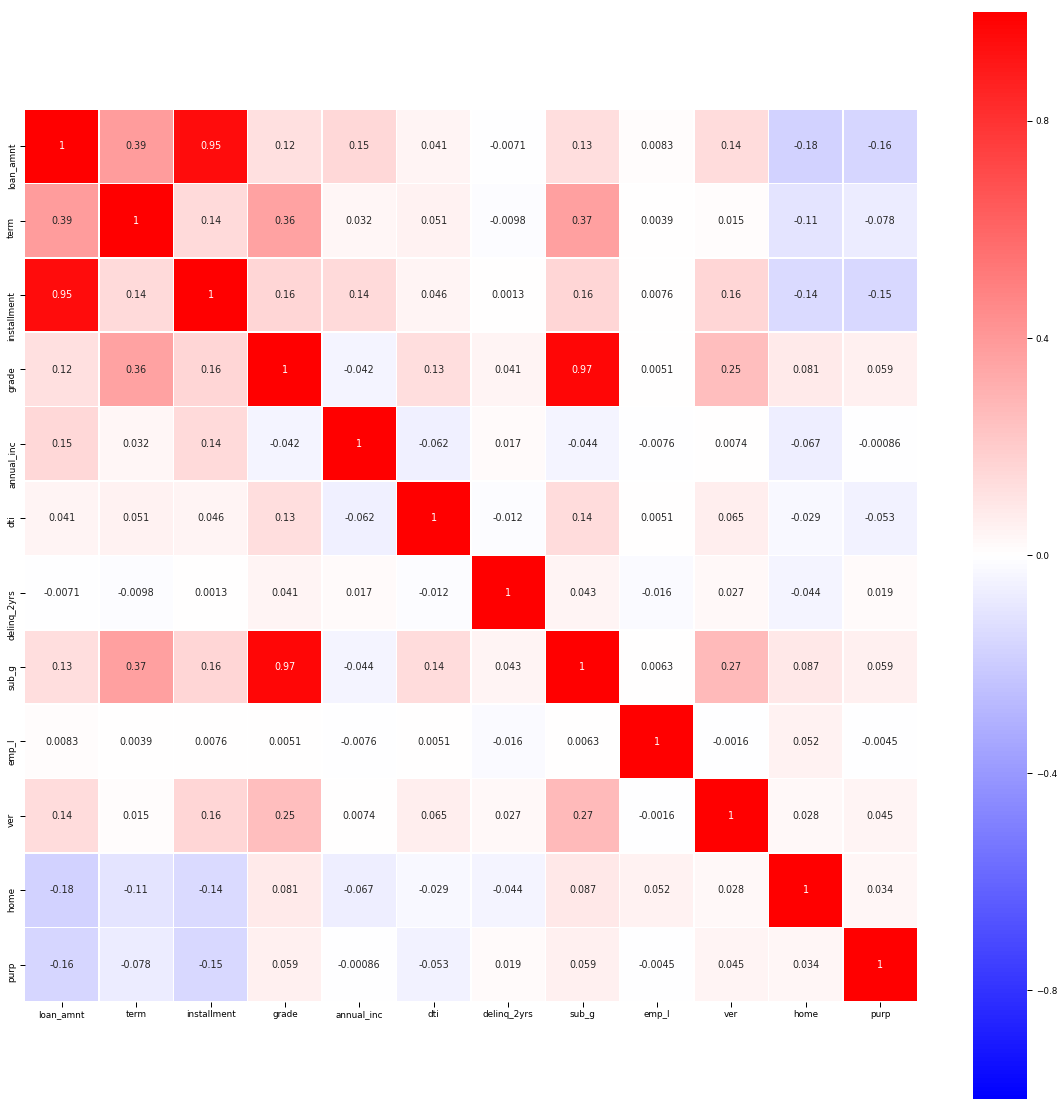

In [349]:
plt.figure(figsize=(20,20))
sns.set_context("paper", font_scale=1)
##finding the correllation matrix and changing the categorical data to category for the plot.
sns.heatmap(df_LC.assign(grade=df_LC.grade.astype('category').cat.codes,
                         sub_g=df_LC.sub_grade.astype('category').cat.codes,
                         term=df_LC.term.astype('category').cat.codes,
                        emp_l=df_LC.emp_length.astype('category').cat.codes,
                         ver =df_LC.verification_status.astype('category').cat.codes,
                        home=df_LC.home_ownership.astype('category').cat.codes,
                        purp=df_LC.purpose.astype('category').cat.codes).corr(), 
                         annot=True, cmap='bwr',vmin=-1, vmax=1, square=True, linewidths=0.5)

Lets look at some more visualizations

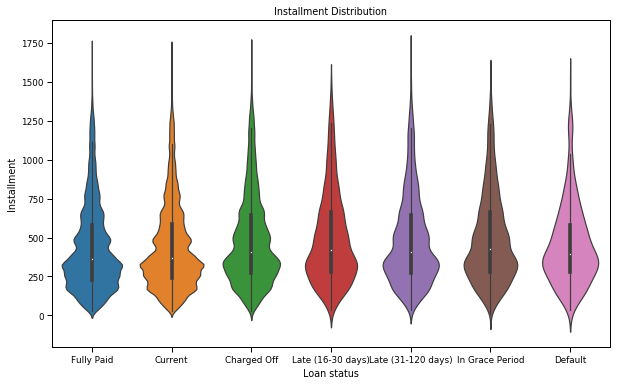

In [359]:
plt.figure(figsize=(10,6))


ax = sns.violinplot(x="loan_status", y="installment", data=data)
ax = plt.xlabel('Loan status')
ax = plt.ylabel('Installment')
ax = plt.title('Installment Distribution')

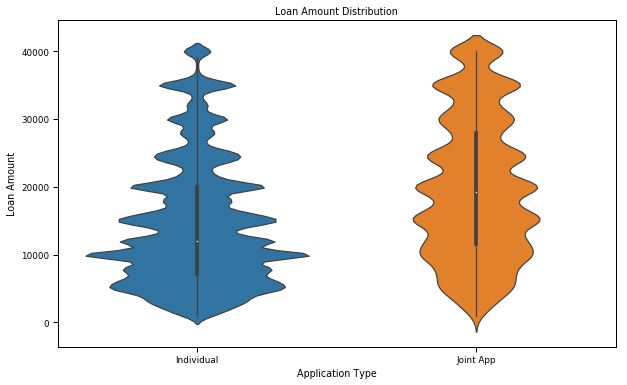

In [365]:
plt.figure(figsize=(10,6))


ax = sns.violinplot(x="application_type", y="loan_amnt", data=data)
ax = plt.xlabel('Application Type')
ax = plt.ylabel('Loan Amount')
ax = plt.title('Loan Amount Distribution')

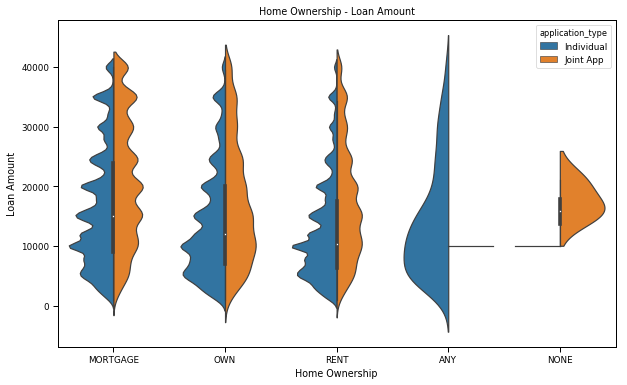

In [366]:
plt.figure(figsize=(10,6))


ax = sns.violinplot(x="home_ownership", y="loan_amnt", hue='application_type', split=True, data=data)
ax = plt.xlabel('Home Ownership')
ax = plt.ylabel('Loan Amount')
ax = plt.title('Home Ownership - Loan Amount')

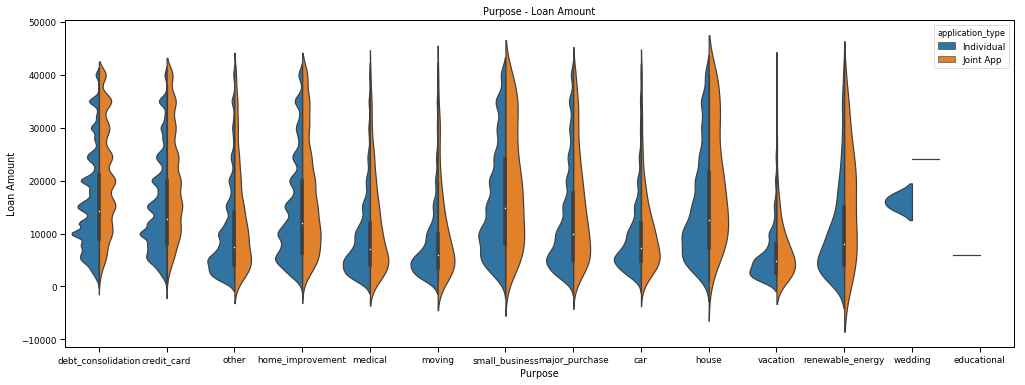

In [369]:
plt.figure(figsize=(17,6))


ax = sns.violinplot(x="purpose", y="loan_amnt", hue='application_type', split=True, data=data)
ax = plt.xlabel('Purpose')
ax = plt.ylabel('Loan Amount')
ax = plt.title('Purpose - Loan Amount')

These are just sample visualizations. Detailed EDA is worked in Tableau.